# Networks and their Structure Assignment

## Network Science Topic 1

Note that the networks in this exercise are all directed.

1. Obtain the code and dataset and load ``citation_graph`` from ``topic1b.ipynb`` and, from ``topic1e.ipynb``, the PA graph ``EX_GRAPH_PA1`` used to model it.  Using the function ``local_clustering_coefficient`` in ``NatSfunctions.ipynb``, create two plots showing the normalized distribution of the local clustering coefficients for these two graphs.  To achieve this, round each value to two decimal places.


In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%run NatSfunctions.ipynb

In [7]:
citation_graph = load_graph("alg_phys-cite.txt")
EX_GRAPH_PA1 = make_PA_Graph(27770, 13)

Loaded graph with 27770 nodes


In [8]:
def clustering_coefficient_distribution(graph):
    """
    Takes a graph and computes the unnormalised distribution of the local clustering coefficients of the graph.
    Returns a dictionary whose keys correspond to local clustering coefficents of nodes and values are the number of nodes
    with that clustering coefficient. The keys are rounded to 2 DPs.
    """
    
    # initialise dictionary for coefficient distribution
    coefficient_distribution = {}
    
    # consider each vertex
    for vertex in graph:
        
        # calculate the local clustering coefficient of this vertex and round to 2 DP
        coefficient = local_clustering_coefficient(graph, vertex)
        rounded_coefficient = round(coefficient, 2)
        
        # update coefficient distribution
        if rounded_coefficient not in coefficient_distribution:
            coefficient_distribution[rounded_coefficient] = 1
        else:
            coefficient_distribution[rounded_coefficient] += 1
    
    return coefficient_distribution

In [45]:
# normalise the distribution
def normalise_coefficient_distribution(graph):

    coefficient_distribution = clustering_coefficient_distribution(graph)
    normalised_coefficient_distribution = {}

    for coefficient in coefficient_distribution:
        normalised_coefficient_distribution[coefficient] = coefficient_distribution[coefficient] / 27770.0
    
    return normalised_coefficient_distribution

In [50]:
def plot_distributions(normalised_coefficient_distribution1, normalised_coefficient_distribution2):

    xdata1 = []
    xdata2 = []
    
    ydata1 = []
    ydata2 = []
    
    for coefficient in normalised_coefficient_distribution1:
        xdata1 += [coefficient]
        ydata1 += [normalised_coefficient_distribution1[coefficient]]
    
    for coefficient in normalised_coefficient_distribution2:
        xdata2 += [coefficient]
        ydata2 += [normalised_coefficient_distribution2[coefficient]]

    # plot the distribution
    plt.subplot(1, 2, 1)
    plt.loglog(xdata1, ydata1, marker='.', linestyle='None', color='b')
    plt.title('Local Clustering Coefficient Distribution of Citation Graph')
    plt.xlabel('Local Clustering Coefficient')
    plt.ylabel('Normalised Rate')

    plt.subplot(1, 2, 2)
    plt.loglog(xdata2, ydata2, marker='.', linestyle='None', color='b')
    plt.title('Local Clustering Coefficient Distribution of PA Graph')
    plt.xlabel('Local Clustering Coefficient')
    plt.ylabel('Normalised Rate')
    
    plt.rcParams["figure.figsize"] = (20, 5)

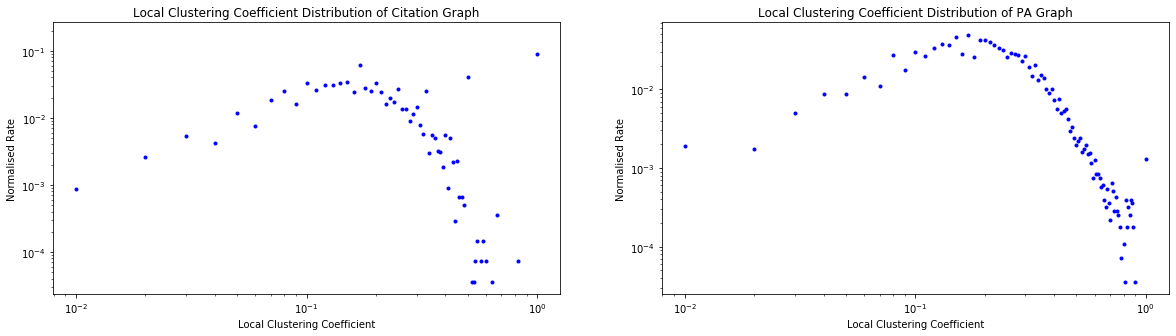

In [52]:
# call functions and plot distributions
citation_coefficient_distribution = normalise_coefficient_distribution(citation_graph)
pa_coefficient_distribution = normalise_coefficient_distribution(EX_GRAPH_PA1)

plot_distributions(citation_coefficient_distribution, pa_coefficient_distribution)

2. A PA graph is constructed one node at a time and the degree of each node will change as further nodes are added.  For PA graphs on 10,000 nodes with $m=m_0=20$, for nodes 0, 30, 60 and 90, plot, on the same axes, their in-degree against the number of nodes added to the graph.  (That is, how do their in-degrees increase over time?).  Comment on what you find with reference to a real network that is believed to have the preferential attachment property.

3. Consider the following network model that constructs a *C graph* with parameters $n$, $m$ and $p$ as follows:
    - Construct a complete graph on $m$ nodes
    - Add $n-m$ further nodes and to each node $v$ add $m$ outgoing edges using the following process for each one:
        * Pick a random node $w$ from the network constructed so far.
        * Either, with probability $p$ add an edge from $v$ to $w$, or
        *  with probability $1-p$ add an edge from $v$ to a neighbour of $w$ chosen at random

Investigate C graphs by generating instances and looking at their properties.  You can choose $n=2000$, $m=20$ and vary $p$.  Comment on your findings.  Do C graphs provide an intuitive model for any real networks?

You will need to submit all code, plots and written answers for this question.  You can do this most simply by extending this notebook, but you can also, for example, submit py, pdf and image files.  You will be given detailed instructions on the submission for this module before the deadline next term.